In [38]:
import numpy as np
import pandas as pd
import os
import dask.dataframe as dd

import pickle

In [39]:
wd = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/results/'
pvalues_files = [i for i in os.listdir(wd) if 'wo_calibration_pvalue_full_genome_' in i]

In [40]:
dict_snps = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/var_pos_grenenet.csv'
dict_snps = pd.read_csv(dict_snps)['id']

In [41]:
dict_snps

0               1_291
1               1_346
2               1_349
3               1_352
4               1_353
              ...    
3235475    5_26975208
3235476    5_26975215
3235477    5_26975267
3235478    5_26975272
3235479    5_26975288
Name: id, Length: 3235480, dtype: object

In [42]:
pvalues_file = pvalues_files[0]

In [43]:
pd.Series([int(i.split('_')[-1].replace('.csv', '').replace('bio', '')) for i in pvalues_files]).sort_values()

6      1
9      2
18     3
17     4
10     5
5      6
2      7
4      8
3      9
13    10
14    11
1     12
7     13
8     14
0     15
15    16
12    17
16    18
11    19
dtype: int64

In [45]:
pvalues_files

['wo_calibration_pvalue_full_genome_bio15.csv',
 'wo_calibration_pvalue_full_genome_bio12.csv',
 'wo_calibration_pvalue_full_genome_bio7.csv',
 'wo_calibration_pvalue_full_genome_bio9.csv',
 'wo_calibration_pvalue_full_genome_bio8.csv',
 'wo_calibration_pvalue_full_genome_bio6.csv',
 'wo_calibration_pvalue_full_genome_bio1.csv',
 'wo_calibration_pvalue_full_genome_bio13.csv',
 'wo_calibration_pvalue_full_genome_bio14.csv',
 'wo_calibration_pvalue_full_genome_bio2.csv',
 'wo_calibration_pvalue_full_genome_bio5.csv',
 'wo_calibration_pvalue_full_genome_bio19.csv',
 'wo_calibration_pvalue_full_genome_bio17.csv',
 'wo_calibration_pvalue_full_genome_bio10.csv',
 'wo_calibration_pvalue_full_genome_bio11.csv',
 'wo_calibration_pvalue_full_genome_bio16.csv',
 'wo_calibration_pvalue_full_genome_bio18.csv',
 'wo_calibration_pvalue_full_genome_bio4.csv',
 'wo_calibration_pvalue_full_genome_bio3.csv']

In [63]:
pvalues_file = 'wo_calibration_pvalue_full_genome_bio1.csv'

In [65]:
pvalues = dd.read_csv(wd + pvalues_file)
pvalues = pvalues.compute().drop('Unnamed: 0', axis=1)

In [66]:
pvalues

,bio1
0,0.152348
1,0.087014
2,0.002894
3,0.168146
4,0.420230
...,...
3235475,0.603363
3235476,0.074736
3235477,0.560867
3235478,0.040286


In [50]:
biovar = pvalues_file.split('_')[-1].replace('.csv', '')
print(biovar)
pvalues = dd.read_csv(wd + pvalues_files[0])
pvalues = pvalues.compute().drop('Unnamed: 0', axis=1)
pvalues = pd.concat([dict_snps,pvalues],axis=1)
pvalues.columns = ['SNP', 'P']
pvalues.to_csv(f'input_clumping_{biovar}.txt', index=None, sep = ' ')

bio1


In [52]:
threshold_value = 0.05 / len(pvalues)

In [67]:
pvalues[pvalues['bio1']< threshold_value]

,bio1
20352,3.060209e-09
20353,6.457042e-09
20354,6.202883e-09
21393,5.147820e-09
21398,4.776717e-09
...,...
3212922,7.092732e-09
3214025,1.619015e-09
3222880,4.923260e-09
3233732,1.645391e-09


In [68]:
for pvalues_file in pvalues_files:
    biovar = pvalues_file.split('_')[-1].replace('.csv', '')
    print(biovar)
    pvalues = dd.read_csv(wd + pvalues_file)
    pvalues = pvalues.compute().drop('Unnamed: 0', axis=1)
    pvalues = pd.concat([dict_snps,pvalues],axis=1)
    pvalues.columns = ['SNP', 'P']
    pvalues.to_csv(f'input_clumping_{biovar}.txt', index=None, sep = ' ')

bio15
bio12
bio7
bio9
bio8
bio6
bio1
bio13
bio14
bio2
bio5
bio19
bio17
bio10
bio11
bio16
bio18
bio4
bio3


In [3]:
root_directory = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/'  # Update this to the directory you want to search
target_filename = 'snps_indices_bio1.csv'
snps_indices_bio1_files = find_files(root_directory, target_filename)

In [4]:
snps_indices_bio1_files[0]

'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_82/snps_indices_bio1.csv'

In [5]:
snps_indices_bio1 = pd.read_csv(snps_indices_bio1_files[0])


In [6]:
snps_0index = snps_indices_bio1['x'] - 1 

In [7]:
## get the vcf file frothe chromosomes and positions 
import allel
## ld pruned vcf file
vcf_file = '/carnegie/nobackup/scratch/xwu/grenet/hapFIRE_updatedVCF/greneNet_final_v1.1.recode.vcf'
vcf = allel.read_vcf(vcf_file)

/home/tbellagio/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
variants = vcf['calldata/GT']
pos = vcf['variants/POS']
chrom = vcf['variants/CHROM']

In [10]:
split_number = 1

In [11]:
snps_indices_bio1_file = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/snps_indices_bio1.csv'

In [23]:
snps_indices_bio1 = pd.read_csv(snps_indices_bio1_file)


In [50]:
for pvalues_file in pvalues_files:
    snps_indices_bio1_file = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/snps_indices_bio1.csv'
    output = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/input_clumping.txt'
    dict_rpos_index0_file = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/dict_rpos_index0.pkl'
    p_values_file = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_{split_number}/delta_p/wo_calibration_pvalue_full_genome.csv'
    
    p_values = pd.read_csv(pvalues_file)
    snps_indices_bio1 = pd.read_csv(snps_indices_bio1_file)
    snps_0index = snps_indices_bio1['x'] - 1 
    chr_selected = pd.Series(chrom).iloc[snps_0index.to_list()]
    pos_selected = pd.Series(pos).iloc[snps_0index.to_list()]
    pos_selected = chr_selected.astype(str) + '_' + pos_selected.astype(str)
    pos_selected = pos_selected.reset_index(drop=True)
    
    dict_rpos_index0 = dict(zip(pos_selected, snps_0index))
    
    ## save the pikl relating the index0  with the actual snp id 
    with open(dict_rpos_index0_file, 'wb') as f:
        pickle.dump(dict_rpos_index0, f)  
    
    p_values_sel = p_values.iloc[snps_0index]['V1']
    p_values_sel = p_values_sel.reset_index(drop=True)
    # Writing the SNP ID and p-value pairs to a text file
    snp_p_values = list(zip(pos_selected, p_values_sel))
    with open(output, 'w') as file:
        # Write the header
        file.write("SNP P\n")  # Assuming you want headers named 'SNP' and 'P'
        for snp_id, p_value in snp_p_values:
            file.write(f"{snp_id} {p_value}\n")

In [11]:
root_directory = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/'  # Update this to the directory you want to search
target_filename = 'dict_rpos_index0.pkl'
dict_rpos_index0_files = find_files(root_directory, target_filename)

In [12]:
root_directory = '/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/'  # Update this to the directory you want to search
target_filename = 'input_clumping.txt'
input_clumping_files = find_files(root_directory, target_filename)

In [79]:
len(input_clumping_files)

100

In [ ]:
plink 
--bfile grenenet_og 
--clump /carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_82/input_clumping.txt 
--clump-p1 0.05 
--clump-r2 0.5 
--out /carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_82/output_clumping

In [80]:
input_clumping_files[0]

'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/split_number_82/input_clumping.txt'

In [86]:
!pwd

/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out/clumping


In [89]:
clumped_data = pd.read_csv('split82.clumped', delim_whitespace=True)

In [92]:
clumped_data['F'].unique()

array([1])

In [93]:
clumped_data

,CHR,F,SNP,BP,P,TOTAL,NSIG,S05,S01,S001,S0001,SP2
0,1,1,1_194098,194098,0.0001,0,0,0,0,0,0,NONE
1,1,1,1_349186,349186,0.0001,32,0,0,0,32,0,"1_349208(1),1_349211(1),1_349223(1),1_349437(1..."
2,1,1,1_863771,863771,0.0001,0,0,0,0,0,0,NONE
3,1,1,1_902148,902148,0.0001,2,0,0,0,2,0,"1_902996(1),1_903072(1)"
4,1,1,1_909659,909659,0.0001,9,0,0,0,9,0,"1_909948(1),1_911139(1),1_911144(1),1_911148(1..."
...,...,...,...,...,...,...,...,...,...,...,...,...
567,5,1,5_26723006,26723006,0.0001,2,0,0,0,2,0,"5_26725740(1),5_26728478(1)"
568,5,1,5_26882706,26882706,0.0001,2,0,0,0,2,0,"5_26891593(1),5_26902832(1)"
569,5,1,5_26901427,26901427,0.0001,1,0,0,0,1,0,5_26901516(1)
570,5,1,5_26901571,26901571,0.0001,0,0,0,0,0,0,NONE


In [70]:
pos_selected = pos_selected.to_list()

In [69]:
from upsetplot import generate_counts
example = generate_counts()
example

cat0   cat1   cat2 
False  False  False      56
              True      283
       True   False    1279
              True     5882
True   False  False      24
              True       90
       True   False     429
              True     1957
Name: value, dtype: int64

In [71]:
example

cat0   cat1   cat2 
False  False  False      56
              True      283
       True   False    1279
              True     5882
True   False  False      24
              True       90
       True   False     429
              True     1957
Name: value, dtype: int64

In [72]:
clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')

biovars = clim_sites_during_exp.columns[1:]

In [145]:
sign_blocks = pd.DataFrame()
for biovar in biovars:
    block = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/lfmm_full/results/sign_blocks_{biovar}.csv'
    block = pd.read_csv(block)
    block['biovar'] =  biovar
    block = block.drop(biovar, axis=1)
    sign_blocks = pd.concat([sign_blocks, block], axis=0)
    #sign_blocks[biovar] = block['block'].tolist()

In [130]:
sign_blocks[sign_blocks['biovar'] == 'bio15'].index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       6852, 6853, 6854, 6855, 6856, 6857, 6858, 6859, 6860, 6861],
      dtype='int64', length=6862)

In [134]:
sign_blocks = sign_blocks[sign_blocks['biovar'] != 'bio15']

In [138]:
sign_blocks = sign_blocks[sign_blocks['biovar'] != 'bio13']

In [139]:

# Convert 'biovar' to categorical and then get dummies
biovars = sign_blocks['biovar'].unique()
biovars.sort()  # Ensure consistent order
df_pivot = pd.get_dummies(sign_blocks.set_index('block')['biovar']).groupby('block').max()

# Now group by these categories and count occurrences
result = df_pivot.groupby(list(df_pivot.columns)).size()

In [140]:
result

bio1   bio10  bio11  bio12  bio14  bio16  bio17  bio18  bio2   bio3   bio4   bio5   bio6   bio7   bio8 
False  False  False  False  False  False  False  False  False  False  False  False  False  False  True      27
                                                                                    True   False  False     18
                                                                                           True   False      1
                                                                             True   False  False  False      2
                                                                      True   False  False  False  False    355
                                                                                                          ... 
True   True   True   False  False  False  True   False  False  False  False  True   False  False  False      1
                                                               True   False  False  False  False  False      1
        

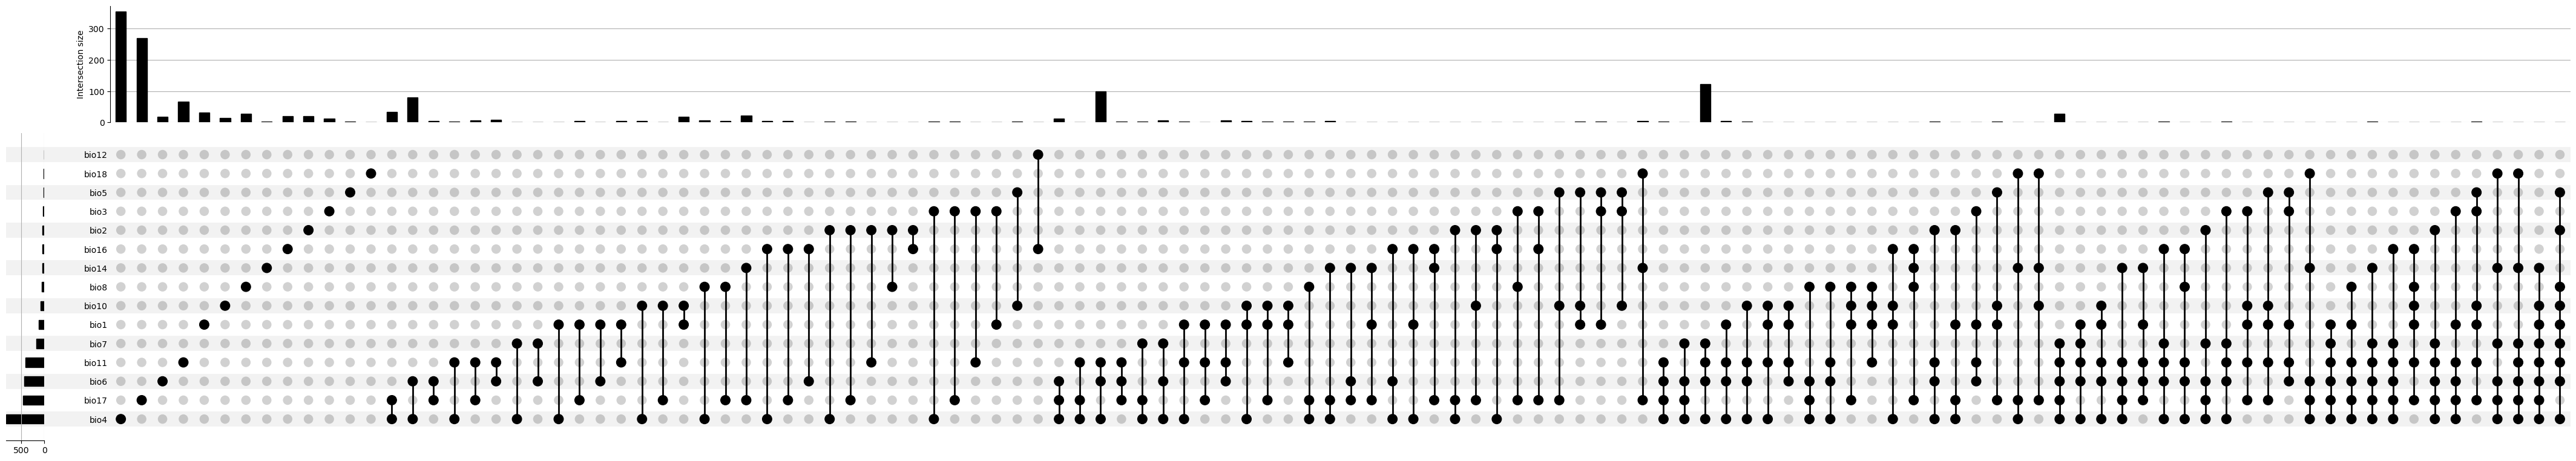

In [141]:
from upsetplot import plot
plot(result)  
from matplotlib import pyplot
pyplot.show()  

In [146]:
df = pd.DataFrame(sign_blocks)

# Convert 'biovar' to categorical and then get dummies
df_pivot = pd.get_dummies(df.set_index('block')['biovar']).groupby('block').max()

# Filter blocks that are 'True' in at least 5 biovars
filtered_df = df_pivot[df_pivot.sum(axis=1) >= 5]

# Now group by these categories and count occurrences
result = filtered_df.groupby(list(filtered_df.columns)).size()

print(result)

bio1   bio10  bio11  bio12  bio14  bio16  bio17  bio18  bio2   bio3   bio4   bio5   bio6   bio7   bio8 
False  False  False  False  False  False  True   False  True   False  True   False  True   True   False     1
                            True   False  True   True   False  False  True   False  True   False  False     1
                                                                                           True   False     1
              True   False  False  False  False  False  False  True   True   False  True   True   False     2
                                          True   False  False  False  True   False  True   True   False    28
                                                        True   False  True   False  True   True   False     1
                                   True   False  False  False  False  True   False  True   False  True      1
                                                                                           True   False     2
                

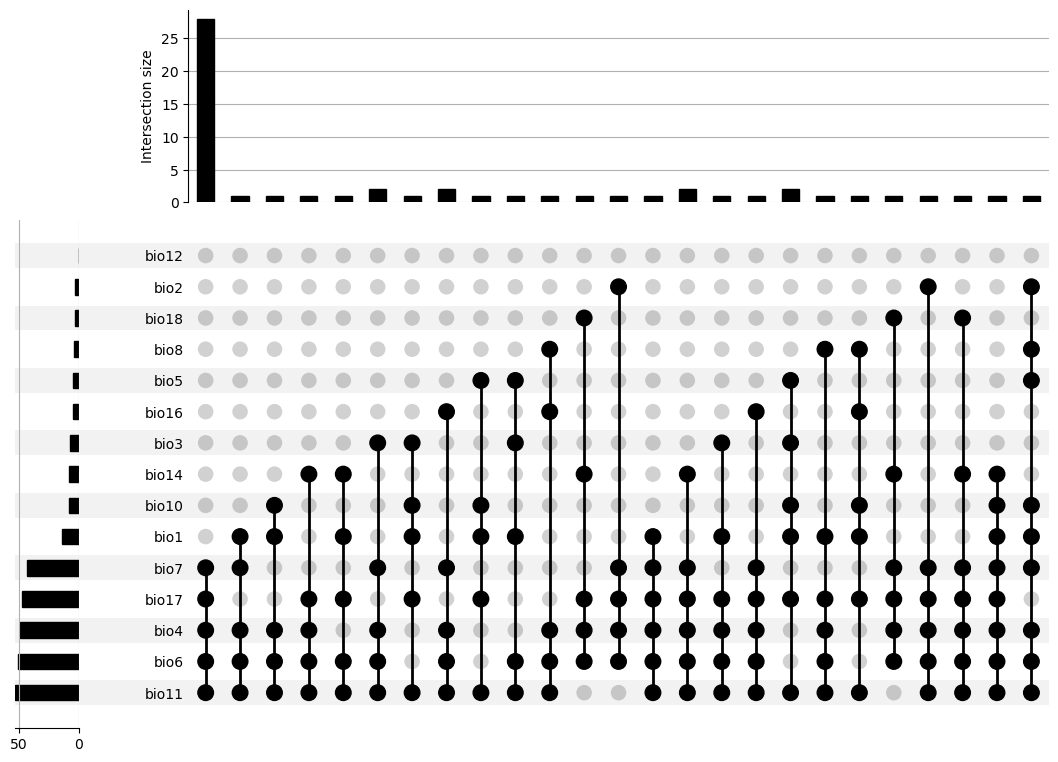

In [147]:
from upsetplot import plot
plot(result)  
from matplotlib import pyplot
pyplot.show()  

In [105]:
example

cat0   cat1   cat2 
False  False  False      56
              True      283
       True   False    1279
              True     5882
True   False  False      24
              True       90
       True   False     429
              True     1957
Name: value, dtype: int64

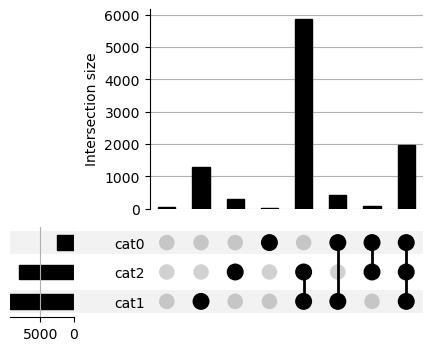

In [70]:
from upsetplot import plot
plot(example)  
from matplotlib import pyplot
pyplot.show()  

In [102]:
from itertools import combinations


In [103]:
import matplotlib.pyplot as plt
import numpy as np

def custom_upset_plot(data):
    # Extract sets and their names
    sets = [set(values) for values in data.values()]
    labels = list(data.keys())
    
    # Compute the intersections
    intersections = {}
    for i in range(1, len(sets) + 1):
        for combo in combinations(range(len(sets)), i):
            intersected_set = sets[combo[0]]
            for index in combo[1:]:
                intersected_set = intersected_set.intersection(sets[index])
            intersections[combo] = len(intersected_set)
    
    # Sort intersections by size
    intersections = {k: v for k, v in sorted(intersections.items(), key=lambda item: item[1], reverse=True)}
    
    # Plotting
    fig, ax = plt.subplots()
    bar_positions = np.arange(len(intersections))
    bar_heights = [intersections[k] for k in intersections]
    
    ax.bar(bar_positions, bar_heights, align='center', alpha=0.7)
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(['_'.join(labels[idx] for idx in k) for k in intersections], rotation=90)
    ax.set_ylabel('Count of Intersections')
    ax.set_title('Custom UpSet Plot of Overlaps')
    plt.tight_layout()
    plt.show()

# Calling the custom upset plot function
custom_upset_plot(data)



KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7fe7e0a375e0> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x7fe7e0a033a0> (for post_execute):


KeyboardInterrupt: 